In [4]:
!pip install boto3

In [248]:
import os
import boto3
from botocore.handlers import disable_signing
import re 
import numpy as np
client = boto3.client('s3')
client.meta.events.register('choose-signer.s3.*', disable_signing)

PIOP1 cohort is in prefix ds002785

preprocessed data are in /derivatives folder

let's get all the task working memory fmri files for   individual sub-001

we can use paginator to research 'task-workingmemory' in the files
 
and a list generator to retrive the "Key" filed on the selected objects 

In [249]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002785/derivatives/fmriprep/sub-0001/func/'}
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'task-workingmemory')]")
task_list=[key_data['Key'] for key_data in filtered_iterator]

Now make a panda dataframe and split the file names 

We can use panda dataframes, split() functions  

and display it within a panda dataframe 

In [250]:
import pandas as pd
files=np.array(task_list)
filename_split = [x.split("/") for x in  files.tolist()]
pd_filename_list=  pd.DataFrame( filename_split)[5]
pd.DataFrame([y.split("_") for y in  pd_filename_list ])

,0,1,2,3,4,5
0,sub-0001,task-workingmemory,acq-seq,desc-confounds,regressors.json,None
1,sub-0001,task-workingmemory,acq-seq,desc-confounds,regressors.tsv,None
2,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
3,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
4,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
5,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.json
6,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
7,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.json
8,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
9,sub-0001,task-workingmemory,acq-seq,space-T1w,boldref.nii.gz,None


now list all the nii.gz files

we  can use 'endwith' function 

In [251]:
nii_task=np.array([x.endswith('nii.gz') for x in task_list]) 
nii_files=np.asarray(task_list)[nii_task]
pd.DataFrame([y.split("_") for y in pd.DataFrame([x.split("/") for x in  nii_files])[5] ])

,0,1,2,3,4,5
0,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
1,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
2,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
3,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
4,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
5,sub-0001,task-workingmemory,acq-seq,space-T1w,boldref.nii.gz,None
6,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-aparcaseg,dseg.nii.gz
7,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-aseg,dseg.nii.gz
8,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-brain,mask.nii.gz
9,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-preproc,bold.nii.gz


select the key for preprocessed workingmemory frmi volumes in MNI space

In [252]:
file_key = nii_files[4]  # choose the file you want in nii_list    

In [253]:
import os.path
if not  os.path.exists( "task-workingmemory.nii.gz"): # if the image "taskstop.nii.gz" is not there yet
     client.download_file('openneuro.org', file_key,"task-workingmemory.nii.gz" ) 
#download it to "taskstop.nii.gz"

In [254]:
#Now we do the same to findsegmentation

if not  os.path.exists( "task-workingmemory.seg.nii.gz"):
 client.download_file('openneuro.org',nii_files[2],"task-workingmemory.seg.nii.gz")

Now we do the same to find the event .tsv file for the same individual


In [255]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002785/sub-0001/func/sub-0001_task-workingmemory'} 
                        #we have all the task files here
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'events.tsv')]")
# we want the file that contains "events"


In [256]:
event_list=[a['Key'] for a in filtered_iterator] # we make the file list by getting 'Key'field 
print (event_list)

['ds002785/sub-0001/func/sub-0001_task-workingmemory_acq-seq_events.tsv']


In [257]:
 # there should be only one file
import os.path
if not  os.path.exists( "task-workingmemory.events.tsv"): #if teh .tsv file does not existe yet   
    client.download_file('openneuro.org', event_list[0] ,"task-workingmemory.events.tsv") # download it

In [258]:
pd_events=pd.read_csv("task-workingmemory.events.tsv", sep="\t")
pd_events

,onset,duration,trial_type,response_accuracy,response_time,response_hand
0,8.0,6.0,active_change,miss,NaN,NaN
1,20.0,6.0,active_change,miss,NaN,NaN
2,26.0,6.0,active_nochange,incorrect,0.8861,right
3,36.0,6.0,passive,miss,NaN,NaN
4,42.0,6.0,active_change,correct,0.6736,right
5,52.0,6.0,active_nochange,incorrect,0.9963,right
6,60.0,6.0,active_change,correct,0.7541,right
7,66.0,6.0,active_nochange,incorrect,0.2499,right
8,72.0,6.0,active_change,correct,0.8407,right
9,78.0,6.0,active_change,correct,0.4905,right


In [ ]:
! pip install nilearn

In [185]:
from nilearn import plotting
from nilearn import image as image
import nibabel as nb

In [326]:
img= nli.load_img('task-workingmemory.nii.gz') # read  image "taskstop.nii.gz" with nilear image library 

print(img.get_data().shape) #verify dimensions of teh data

(65, 77, 60, 162)


/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


In [264]:
ref_img=nli.load_img('task-workingmemory_acq-seq_contrast-activeGTpassive_desc-taskfmri_zscore.nii.gz')
seg_img=nli.load_img("task-workingmemory.seg.nii.gz")
premotor_img=nli.load_img('premotor_association-test_z_FDR_0.01.nii.gz')
print(ref_img.shape)
print(seg_img.shape)
print(premotor_img.shape)
#seg_img.get_fdata()[unravel_index(volume_ref.argmax(), volume_ref.shape)]

(65, 77, 60)
(65, 77, 60)
(91, 109, 91)


In [18]:
import numpy as np
mean_img= nli.mean_img(img)
print(mean_img.shape) # compute average image using image library
# plotting commented  for github 
#plotting.view_img(nli.mean_img(img), threshold=0)  # triplanar interactive view of average image

(46, 57, 43)


In [19]:
from matplotlib import pyplot as plt

import numpy as np


(65, 77, 60, 162)
(64, 76)


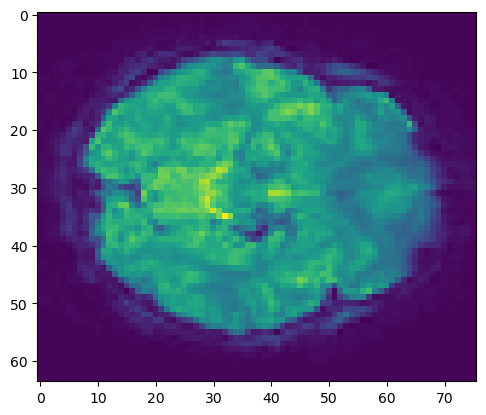

In [307]:
volume= img.get_fdata() # extract 4D array from nilear image object 
print (volume.shape)
flat_slice=volume[1:,1:,20,0] #extract one slice (2D image)
 # use matplotlib imshow to plot the slice  
print (flat_slice.shape)

plt.imshow(flat_slice)


/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(65, 77, 60)



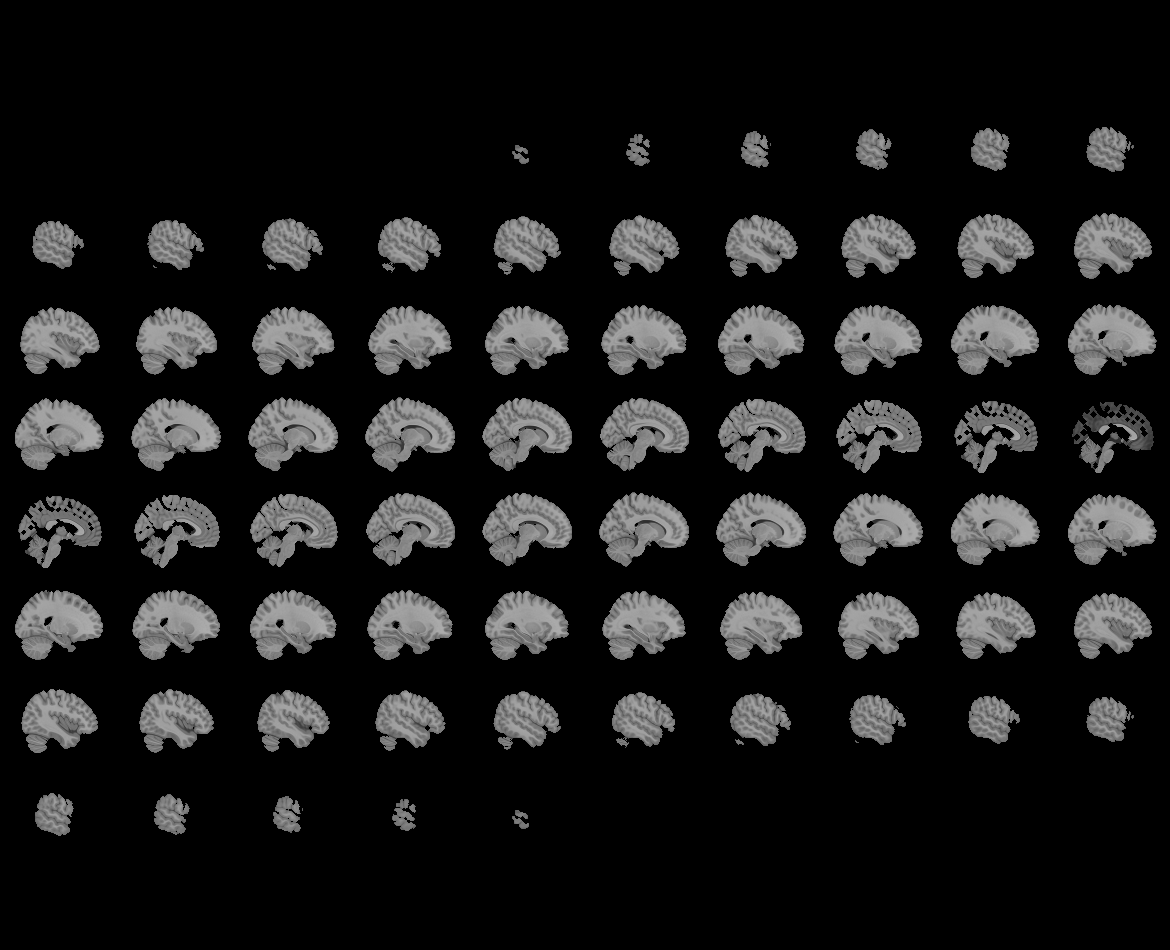
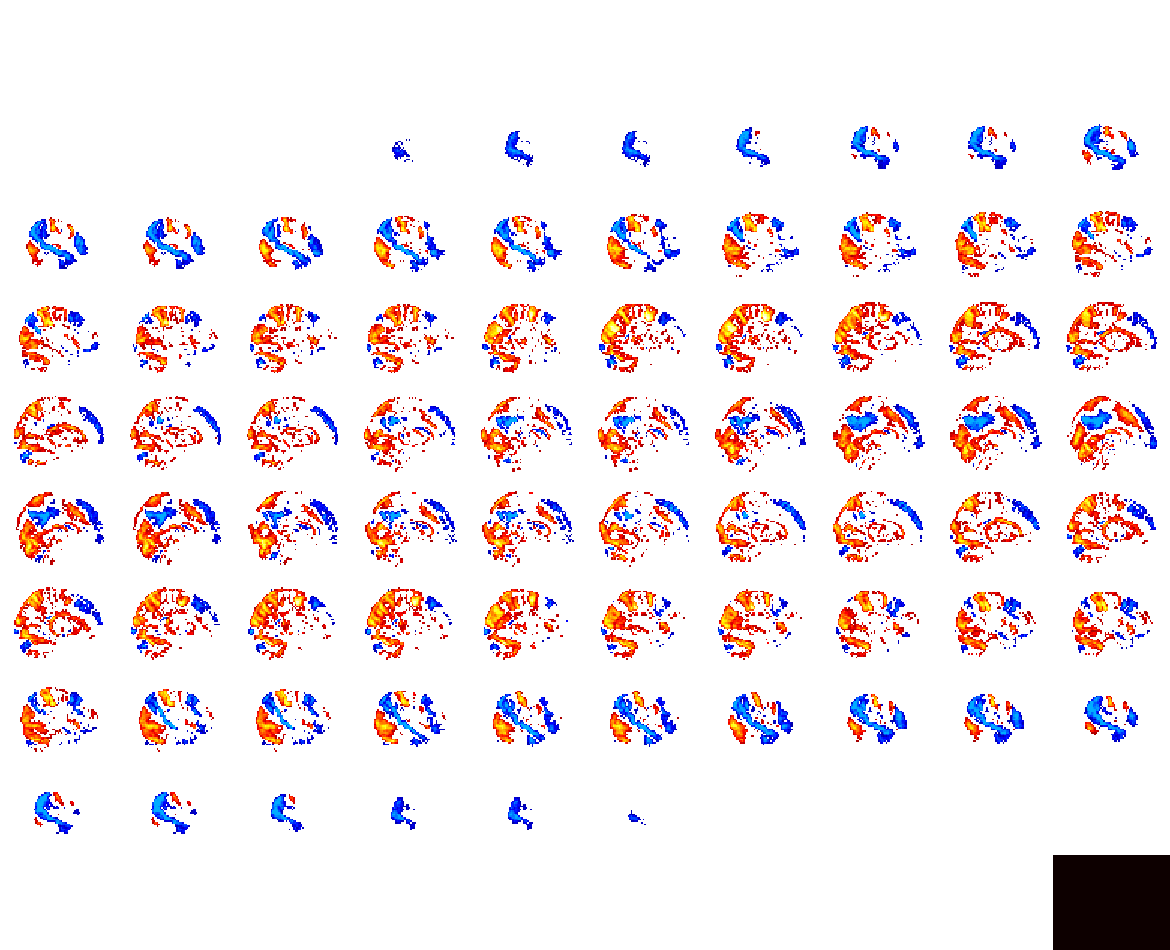

In [203]:
img_zscore=image.load_img("task-workingmemory_acq-seq_contrast-activeGTpassive_desc-taskfmri_zscore.nii.gz")
print(img_zscore.get_data().shape)
plotting.view_img((img_zscore),threshold=3,resampling_interpolation="nearest")

In [787]:
def get_mm_coord(img,coords):
    x,y,z = coords
    shape, affine = img.shape[:3], img.affine
    coords = np.array(np.meshgrid(*(range(i) for i in shape),
                                  indexing='ij'))
    coords = np.rollaxis(coords, 0, len(shape) + 1)
    mm_coords = nb.affines.apply_affine(affine, coords)
    return np.round(mm_coords[x,y,z]).astype(int)

def get_volIdx(img,mm_coords):
    x,y,z = mm_coords
    inv_aff=np.linalg.inv(img.affine)
    idx_real=nb.affines.apply_affine(inv_aff,np.transpose(np.array([x,y,z])), inplace=True)
    return np.floor(idx_real).astype(int)

In [797]:
#x,y,z=(np.unravel_index(np.argmax(img_zscore.get_data()),img_zscore.get_data().shape))

# determine 100 vx threshold :
thr=min(heapq.nlargest(100,img_zscore.get_data().flatten()))
print(thr)
xz,yz,zz=(np.where((img_zscore.get_data())>=thr))
#print(xz,yz,zz)
xm,ym,zm= np.transpose(get_mm_coord(img_zscore,np.array([xz,yz,zz])))
#print(xm,ym,zm)
x,y,z=np.transpose(get_volIdx(img,[xm,ym,zm]))
#print(x,y,z)


11.063675238260585


/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


In [798]:
def build_mask_from_coord(img_,coords):
    x,y,z=coords
    img_segbool=np.zeros(np.array(img_.shape))
    img_segbool[x,y,z]=1
    return nb.Nifti1Image(img_segbool,  affine=img_.affine)
    
    

In [722]:
%matplotlib inline


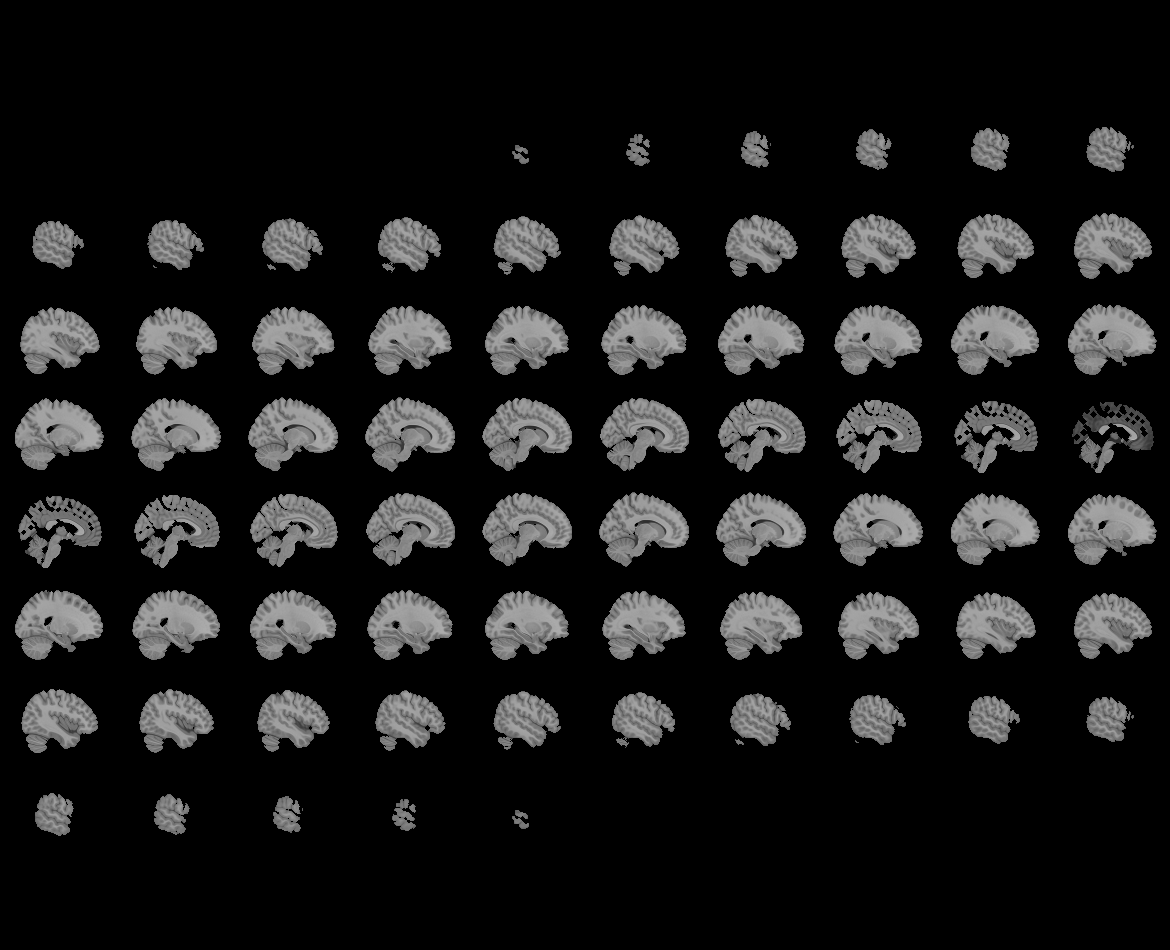
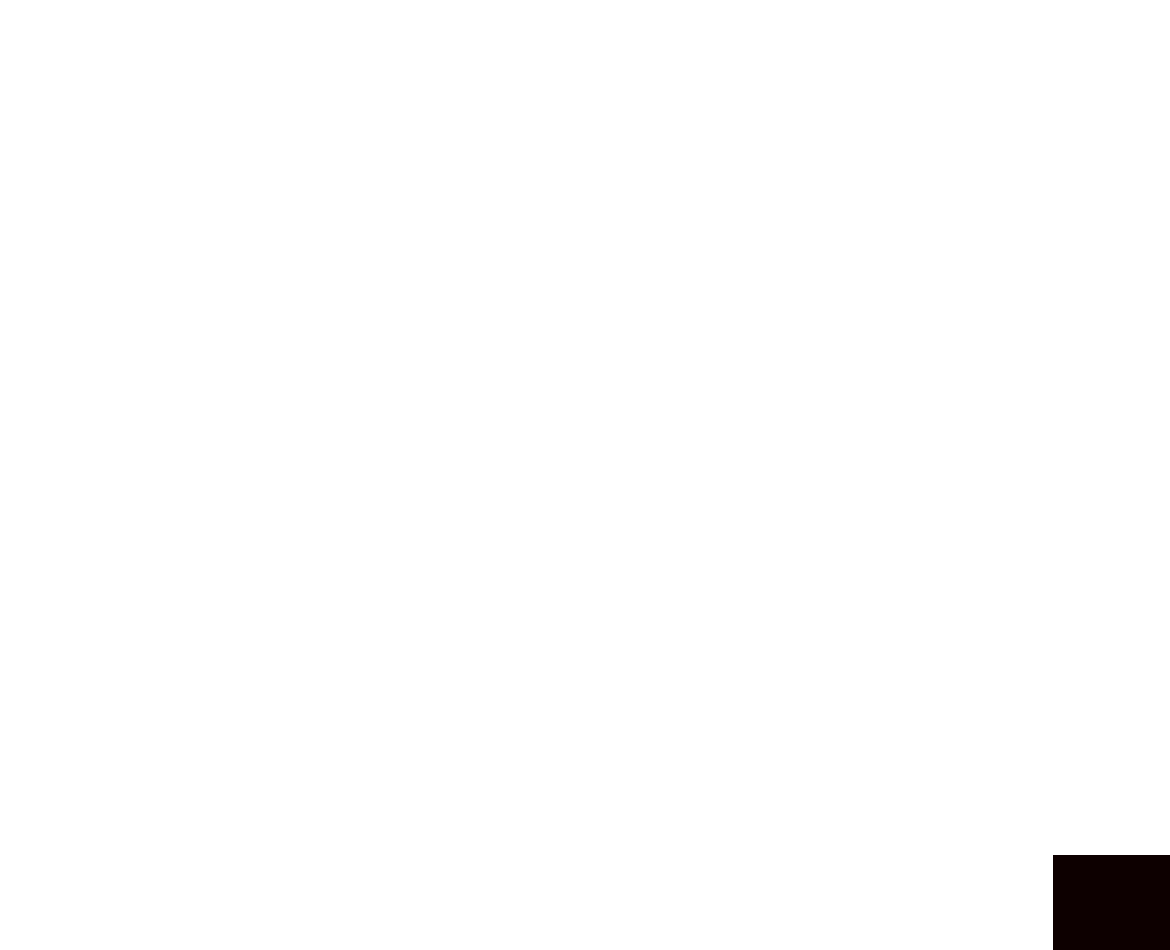

In [799]:
import nibabel as nb
import nilearn.masking as masking
mean_img=image.mean_img(img)
nii_mask=build_mask_from_coord(mean_img,[x,y,z])
plotting.view_img(nii_mask,resampling_interpolation="nearest")

In [800]:
masked_data = masking.apply_mask(imgs=img, mask_img= nii_mask)
masked_data.shape

(162, 86)

No handles with labels found to put in legend.


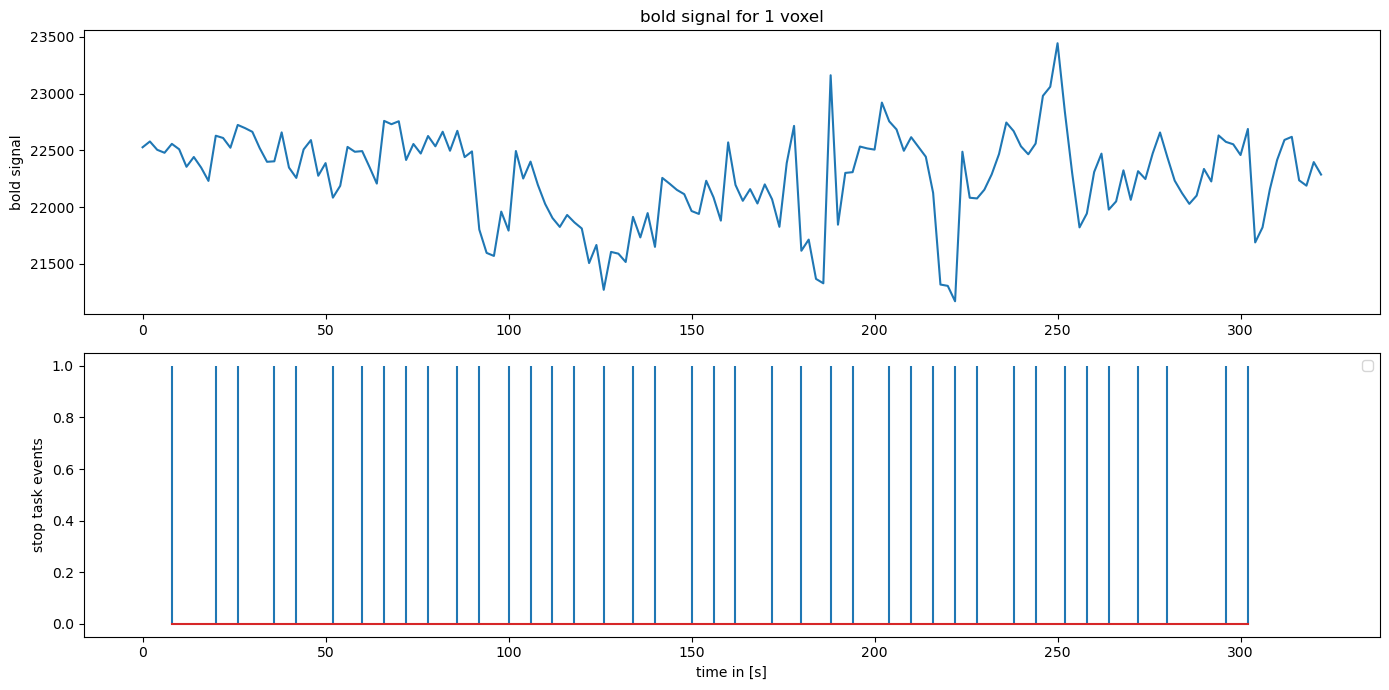

In [801]:
ts=masked_data[:,0]
time_vec= np.array(range(0,len(ts)*dt,dt))
plt.figure(figsize=(14,7))
ax1=plt.subplot(211)
plt.plot(time_vec, ts)#, label='bold signal at'+np.array2string([x,y,z]), linewidth=0.5)
plt.ylabel('bold signal')
plt.title('bold signal for 1 voxel')

plt.subplot(212,  sharex = ax1)
plt.stem(pd_events['onset'],np.ones(pd_events.shape[0]),  markerfmt='None') 

# Add title and labels
plt.ylabel('stop task events')
plt.xlabel('time in [s]')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show() 




In [802]:
file_key=files[2]
print(file_key)
if not  os.path.exists( "my.reg.tsv"): 
    client.download_file("openneuro.org", file_key, "my.reg.tsv")

import pandas as pd
regressor=pd.read_csv("my.reg.tsv",sep="\t")
total_signal=regressor["global_signal"]


ds002785/derivatives/fmriprep/sub-0001/func/sub-0001_task-workingmemory_acq-seq_space-MNI152NLin2009cAsym_boldref.nii.gz


In [803]:
from scipy.fft import fft,fftfreq
from scipy.fftpack import fftshift
from scipy.signal import spectrogram

[-1.64218969e-06  9.52106399e-04 -1.50799910e-01  3.36746967e+00
  2.25234285e+04]


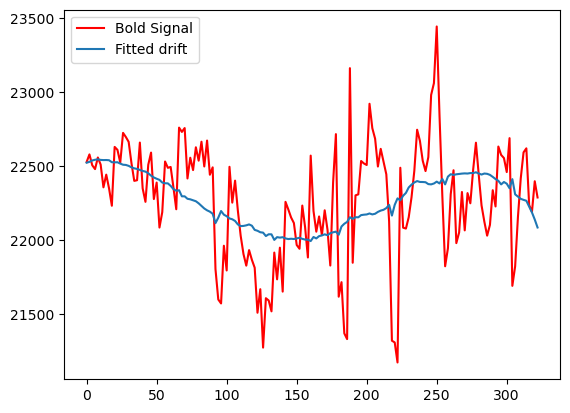

In [929]:
# removing complex signal drift 
# a / fit a 4 degree polynome 
# find a0, a, b, c, d that fit the signal y= a0 + ax + bx² +cx³ +dx⁴
# you can use use the code use in the filtering exercice 
# withoptimize.curve_fit and a test_func 
# or use numpy.polyfit
#p = np.poly1d(np.polyfit(time_vec, ts, 4))

#drift = p(time_vec)
from scipy import optimize
ts=masked_data[:,0]
t = time_vec

param=np.polyfit(t, ts, 4)
print(param)
p = np.poly1d(param)


#drift= test_func(x_data, params[0], params[1], params[2], params[3], params[4] ) #FILL IN
drift= p(t)#test_func(x_data, params[0], params[1], params[2])#, params[3], params[4] ) #FILL IN

z=np.polyfit(total_signal,ts-drift,1)
pp = np.poly1d(z)
drift+= pp(total_signal)


# b/ remove the fitted drift from the signa
y=ts-drift
#plotting the results of the original datapoints and the fitted curve
plt.plot(time_vec, ts, "-r", label = "Bold Signal")
plt.plot(time_vec, drift, label = "Fitted drift")
plt.legend()
# b/ remove the fitted drift from the signal
yf=ts-drift

No handles with labels found to put in legend.
No handles with labels found to put in legend.


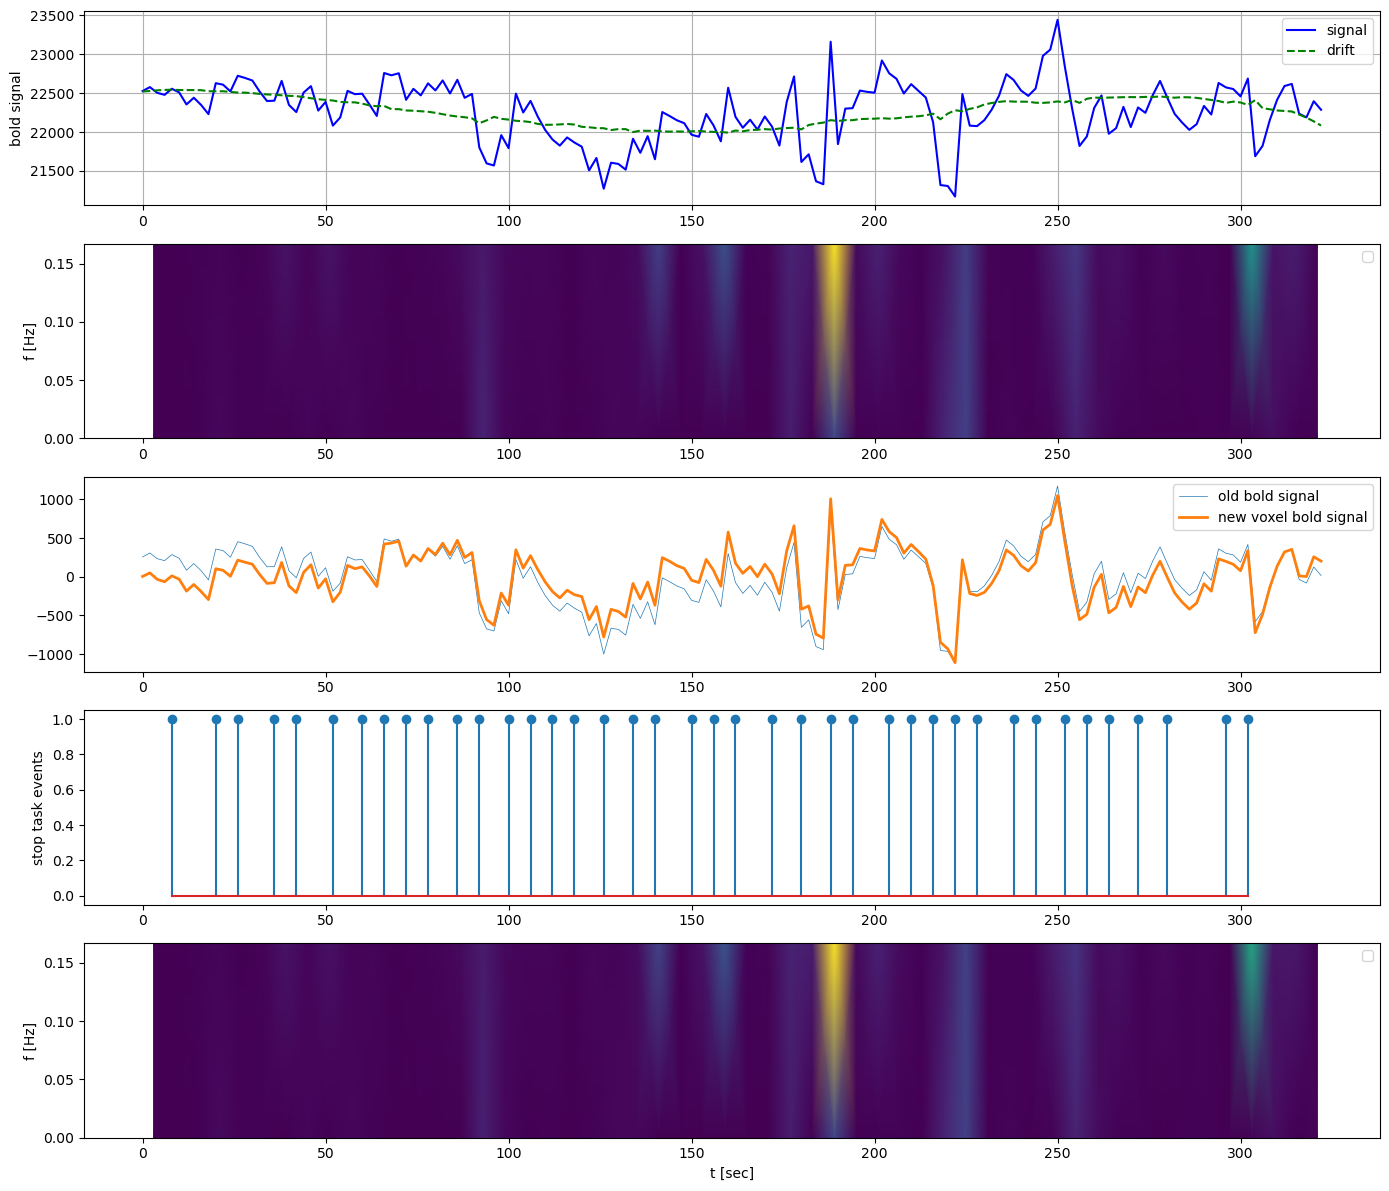

In [930]:
#plotting the whole process
from sklearn import preprocessing

plt.figure(figsize=(14,12))

# plot signal and the fitted drift
ax2=plt.subplot(511)
plt.plot(t, ts, 'b-', label='signal')
plt.plot(t,drift, 'g--', label='drift')
plt.ylabel('bold signal')
plt.legend()
plt.grid()

# plot  sprectrogram for original signal 
freqs, times, spectro = spectrogram( ts,fs=1/dt, nperseg=3)
plt.subplot(512, sharex=ax2)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.legend()




# plot old and new signal (centerd on the mean)
plt.subplot(513, sharex=ax2)
#plt.plot(np.array(range(0,len(ts)))*dt, preprocessing.normalize(ts.reshape(1,-1))[0], label='old bold signal', linewidth=0.5)
#plt.plot(np.array(range(0,len(ts)))*dt, preprocessing.normalize(yf.reshape(1,-1))[0], label='new voxel bold signal', linewidth=2)
plt.plot(np.array(range(0,len(ts)))*dt,ts-ts.mean(), label='old bold signal', linewidth=0.5)
plt.plot(np.array(range(0,len(ts)))*dt,yf, label='new voxel bold signal', linewidth=2)

plt.legend()


# plot events
plt.subplot(514,  sharex = ax2)
plt.stem(pd_events['onset'],np.ones(pd_events.shape[0]))#,  markerfmt='None') 
# Add title and labels
plt.ylabel('stop task events')


# plot  sprectrogram for new signal 
freqs, times, spectro = spectrogram( yf,fs=1/dt, nperseg=3)
plt.subplot(515, sharex=ax2)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

In [931]:
import scipy.signal as sig
# Let's define a function for low-pass filtering using a digital Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    fnyq = 0.5 * fs
    normal_cutoff = cutoff / fnyq
    b, a = sig.butter(order, normal_cutoff, btype='low', output='ba', fs=2, analog=False)
    return b, a

# And a second function for high-pass filtering
def butter_highpass(cutoff, fs, order=5):
    fnyq = 0.5 * fs
    normal_cutoff = cutoff / fnyq
    b, a = sig.butter(order, normal_cutoff, btype='high', output='ba', fs=2, analog=False)
    return b, a

# This function filters the input data and returns the filtered sequence
def butter_filter(data, cutoff, fs, order=5, filtype=''):
    if filtype.lower()=='lowpass':
        b, a = butter_lowpass(cutoff, fs, order=order)
    elif filtype.lower()=='highpass':
        b, a = butter_highpass(cutoff, fs, order=order)        
        
    y = sig.filtfilt(b, a, data)
    return y


order = 6

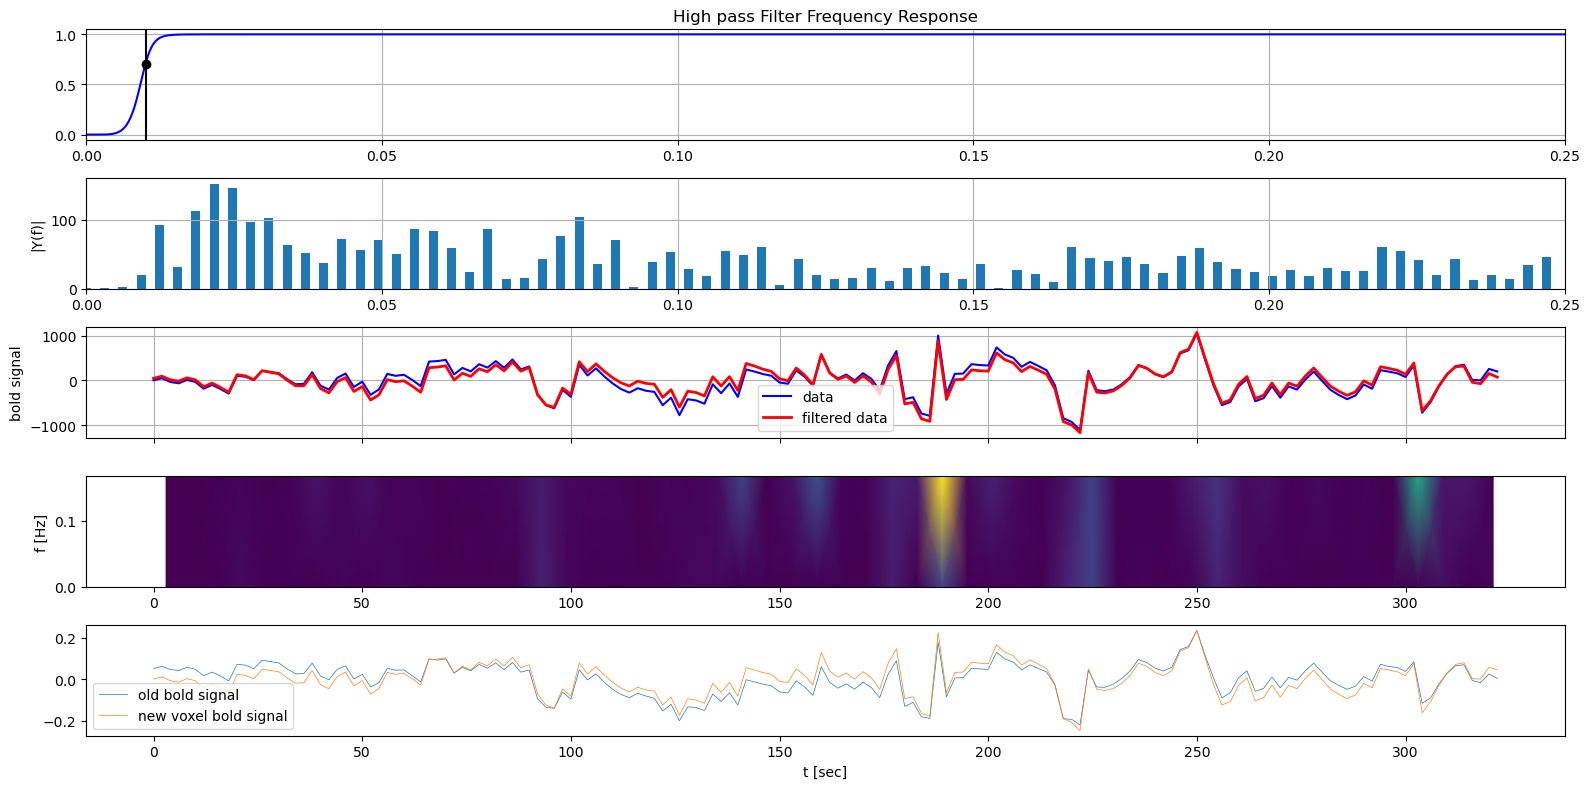

In [932]:
yf=ts-drift
y=yf
# Make a high pass filter with the code used in the filtering exercice 
from math import pi
from scipy.fft import fft, fftfreq, fftshift
from sklearn import preprocessing
# Make a high pass filter

fc = 0.01  # desired cutoff frequency of the filter, Hz
t=time_vec
fs=1/dt

# Make a high pass filter

fc = 0.01  # desired cutoff frequency of the filter, Hz
t=np.array(range(0,len(ts)))*dt2
fs=fs2

dt=dt2
# Get the filter coefficients so we can check its frequency response.
b,a = butter_highpass(fc, fs, order)
# Plot the frequency response.
w, h = sig.freqz(b, a, worN=8000)
plt.figure(figsize=(16,8))
ax1=plt.subplot(511)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc, color='k')
plt.xlim(0, 0.5*fs)
plt.title("High pass Filter Frequency Response")
#plt.xlabel('Frequency [Hz]')
plt.grid()
# Filter the data, and plot both the original and filtered signals.
yf1 = butter_filter(y, fc, fs, order, 'highpass')
# Let's calculate the FFT of the filtered signal and plot the frequency components
N = len(yf) # number of FFT points (length of signal)
Yf = fft(yf1) # calculate the FFT
fv = fftfreq(N, dt)[:N//2] # make the frequency vector
plt.subplot(512, sharex=ax1)
plt.bar(fv, 2.0/N * np.abs(Yf[0:N//2]),width = fs/(2*N) )
#plt.xlim([0,150])
#plt.ylim([0,1])
plt.ylabel('|Y(f)|')
plt.grid()
ax2=plt.subplot(513)
plt.plot(t, y, 'b-', label='data')
plt.plot(t, yf1, 'r-', linewidth=2, label='filtered data')
plt.ylabel('bold signal')
plt.legend()
plt.grid()
#plt.yscale('symlog')
plt.tick_params('x', labelbottom=False)
freqs, times, spectro = spectrogram( yf,fs=fs2, nperseg=3)
plt.subplot(514, sharex=ax2)
#plt.subplots_adjust(hspace=0.75)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.subplot(515, sharex=ax2)
plt.plot(np.array(range(0,len(ts)))*dt2, preprocessing.normalize([ts-ts.mean()])[0], label='old bold signal', linewidth=0.5)
plt.plot(np.array(range(0,len(ts)))*dt2, preprocessing.normalize([yf])[0], label='new voxel bold signal', linewidth=0.5)
#plt.title('total bold signal')
#plt.xlabel('time slice')
# Add legend
plt.xlabel('t [sec]')
plt.legend()
# Auto space
plt.tight_layout()
# Display plot
plt.show()

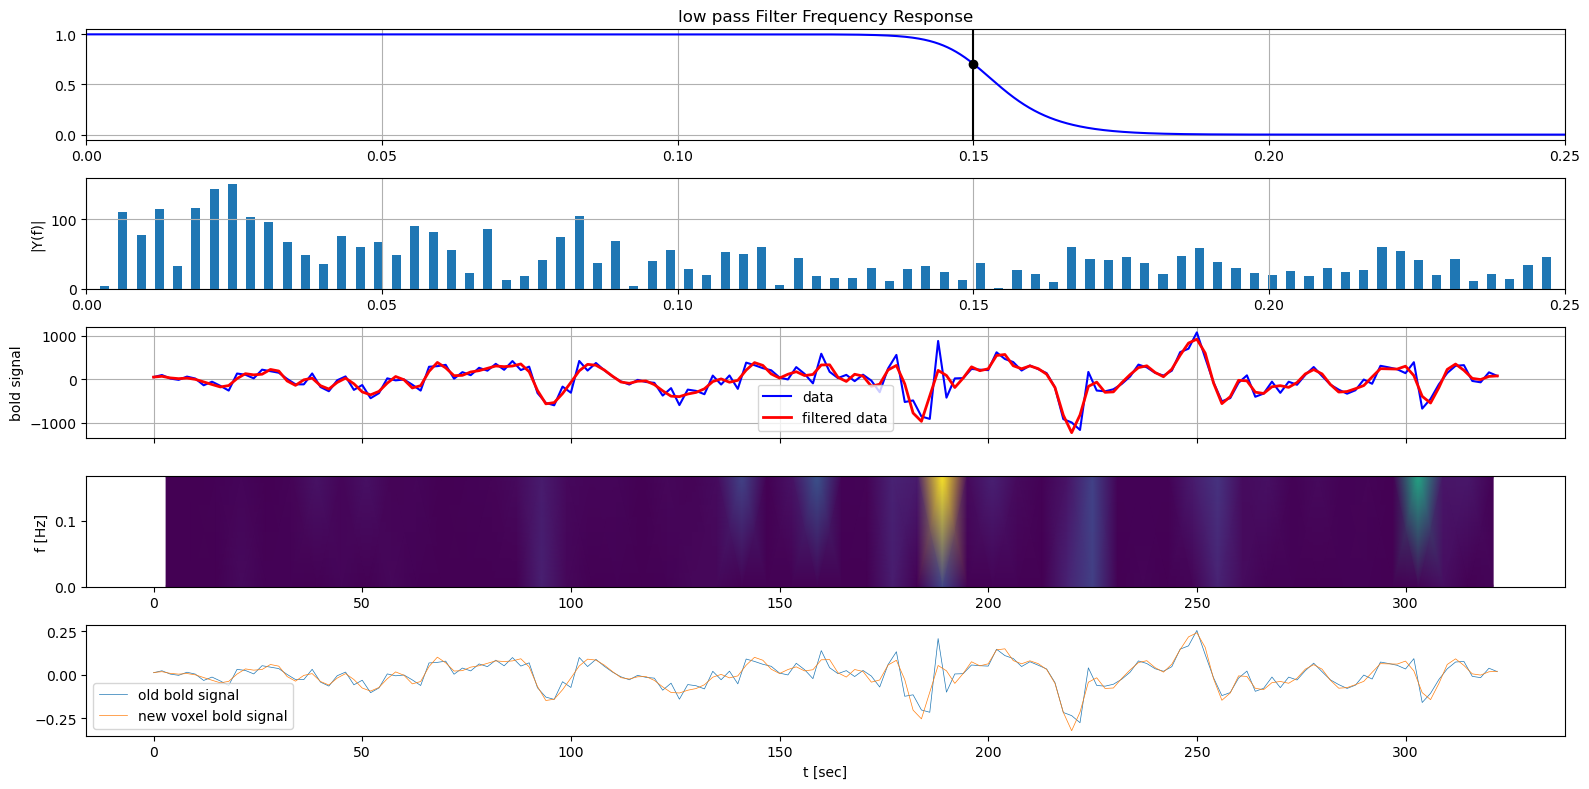

In [933]:
# Make a low pass filter  with the code use in the filtering exercice
y=yf1
fc = 0.15
order=10
# Get the filter coefficients so we can check its frequency response.
b,a = butter_lowpass(fc, fs, order)
# Plot the frequency response.
w, h = sig.freqz(b, a, worN=8000)
plt.figure(figsize=(16,8))
ax1=plt.subplot(511)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(fc, 0.5*np.sqrt(2), 'ko')
plt.axvline(fc, color='k')
plt.xlim(0, 0.5*fs)
plt.title("low pass Filter Frequency Response")
#plt.xlabel('Frequency [Hz]')
plt.grid()
# Filter the data, and plot both the original and filtered signals.
yf2 = butter_filter(yf1, fc, fs, order, 'lowpass')
# Let's calculate the FFT of the filtered signal and plot the frequency components
N = len(yf) # number of FFT points (length of signal)
Yf = fft(yf) # calculate the FFT
fv = fftfreq(N, dt)[:N//2] # make the frequency vector
plt.subplot(512, sharex=ax1)
plt.bar(fv, 2.0/N * np.abs(Yf[0:N//2]),width = fs/(2*N) )
#plt.xlim([0,150])
#plt.ylim([0,1])
plt.ylabel('|Y(f)|')
plt.grid()
ax2=plt.subplot(513)
plt.plot(t, y-y.mean(), 'b-', label='data')
plt.plot(t, yf2-yf2.mean(), 'r-', linewidth=2, label='filtered data')
plt.ylabel('bold signal')
plt.legend()
plt.grid()
#plt.yscale('symlog')
plt.tick_params('x', labelbottom=False)
freqs, times, spectro = spectrogram( yf,fs=fs2, nperseg=3)
plt.subplot(514, sharex=ax2)
#plt.subplots_adjust(hspace=0.75)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.subplot(515, sharex=ax2)
plt.plot(np.array(range(0,len(ts)))*dt2, preprocessing.normalize([yf1-yf1.mean()])[0], label='old bold signal', linewidth=0.5)
plt.plot(np.array(range(0,len(ts)))*dt2, preprocessing.normalize([yf2]-yf2.mean())[0], 
         label='new voxel bold signal', linewidth=0.5)
#plt.title('total bold signal')
#plt.xlabel('time slice')
# Add legend
plt.xlabel('t [sec]')
plt.legend()
# Auto space
plt.tight_layout()
# Display plot
plt.show()

In [934]:
ts=np.transpose(preprocessing.normalize(np.array(yf2-yf2.mean()).reshape(1,-1))[0])

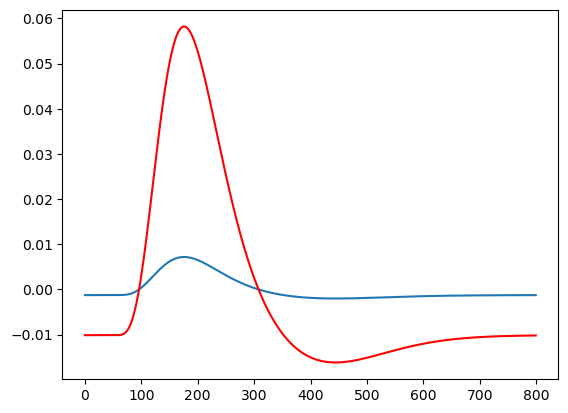

In [941]:
hrf=glm.first_level.spm_hrf(tr=dt, 
                            oversampling=50 ,
                            time_length=32,
                            onset=2)
hrf_t=np.power(5,(1+hrf))
plt.plot(hrf-hrf.mean())
plt.plot( hrf_t -hrf_t.mean(),'-r')

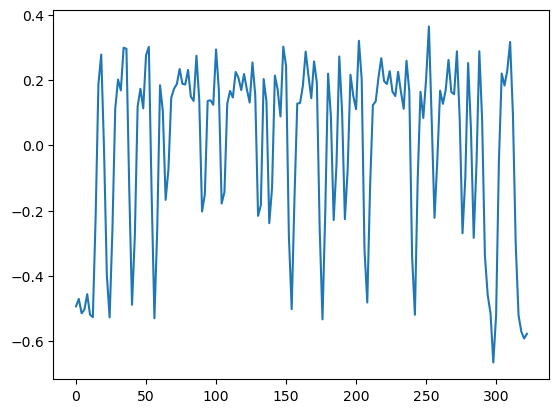

In [942]:
import nilearn.glm as glm
hrf_mod=np.array(np.zeros(len(time_vec))) #initialise an empty hrf response vector
for onset in pd_events['onset']: # use onset events to add hrf to the model
    hrf=glm.first_level.spm_hrf(tr=dt, 
                                       oversampling=1 ,
                                       time_length=max(time_vec+1), 
                                       onset=onset+2)
    hrf_mod += hrf #np.exp(0.15*(1+hrf)) 
    # use  glm.first_level.spm_hrf to add hrf of all onsets - no over sampling    
hrf_mod = butter_filter(2*(hrf_mod-hrf_mod.mean()), 0.15, fs, order, 'lowpass')
plt.plot(time_vec,hrf_mod)

0.8172776935335795

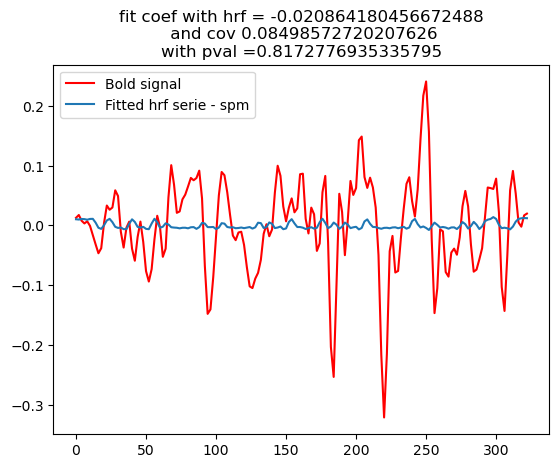

In [943]:
#print(ts)
from scipy.stats import ttest_1samp
from scipy.stats import linregress
def hrf_model_func(hrf_serie,a,b):#,c,d):
    return a + b*hrf_serie

params, params_covariance =  optimize.curve_fit( hrf_model_func,
                                                hrf_mod,
                                                ts,
                                               absolute_sigma=True) #FILL IN; optimize.curve_fit


estimates= hrf_model_func(hrf_mod, params[0], params[1])

tpv=linregress(hrf_mod,ts,alternative= 'greater')
#ttest_1samp(ts-estimates, 0)#,alternative= 'greater')
#plotting the results of the original datapoints and the fitted curve
plt.plot(time_vec, ts, "-r", label = "Bold signal")
plt.plot(time_vec, estimates, label = "Fitted hrf serie - spm")
plt.title("fit coef with hrf = "+str(params[1])+"\n and cov "+str(params_covariance[1,1])+ '\nwith pval ='+str(tpv.pvalue))
plt.legend()
tpv.pvalue


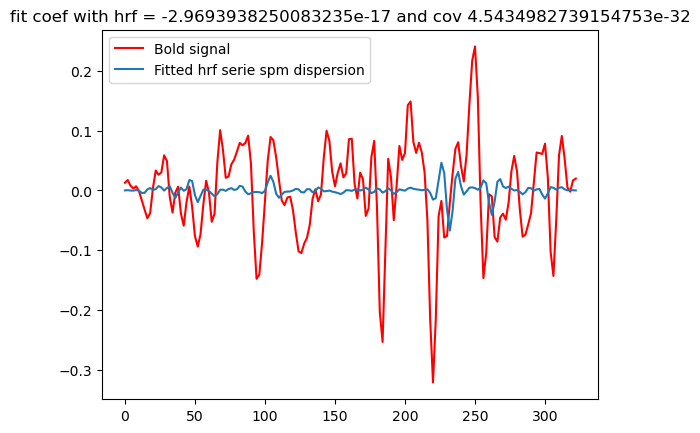

In [812]:
import nilearn.glm as glm
hrf_mod=np.array(np.zeros(len(time_vec))) #initialise an empty hrf response vector
for onset in pd_events['onset']: # use onset events to add hrf to the model
    hrf=glm.first_level.spm_dispersion_derivative(tr=dt, 
                                       oversampling=1 ,
                                       time_length=max(time_vec+1), 
                                       onset=onset)
    hrf_mod += hrf/sum(hrf)
    # use  glm.first_level.spm_hrf to add hrf of all onsets - no over sampling    
hrf_mod = butter_filter(2*(hrf_mod-hrf_mod.mean()), fc, fs, order, 'lowpass')
#print(ts)
def hrf_model_func(hrf_serie,a,b):#,c,d):
    return a + b*hrf_serie

params, params_covariance =  optimize.curve_fit( hrf_model_func,
                                                hrf_mod,
                                                ts,
                                               absolute_sigma=True) #FILL IN; optimize.curve_fit

estimates= hrf_model_func(hrf_mod, params[0], params[1])

#plotting the results of the original datapoints and the fitted curve
plt.plot(time_vec, ts, "-r", label = "Bold signal")
plt.plot(time_vec, estimates, label = "Fitted hrf serie spm dispersion")
plt.title("fit coef with hrf = "+str(params[1])+" and cov "+str(params_covariance[1,1]))
plt.legend()

[-1.18102305e-06 -1.33340905e-02]
[[6.17286733e-03 5.38493442e-06]
 [5.38493442e-06 5.96285952e-02]]


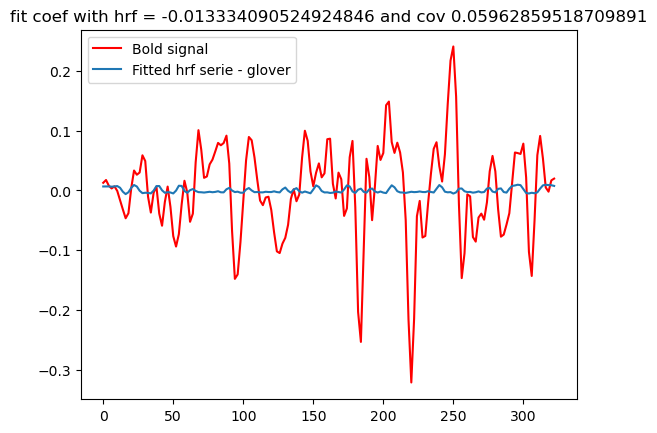

In [813]:
import nilearn.glm as glm
hrf_mod=np.array(np.zeros(len(time_vec))) #initialise an empty hrf response vector
for onset in pd_events['onset']: # use onset events to add hrf to the model
    hrf=glm.first_level.glover_hrf(tr=dt, 
                                       oversampling=1 ,
                                       time_length=max(time_vec+1), 
                                       onset=onset)
    hrf_mod += hrf/sum(hrf)
    # use  glm.first_level.spm_hrf to add hrf of all onsets - no over sampling    
hrf_mod = butter_filter(2*(hrf_mod-hrf_mod.mean()), fc, fs, order, 'lowpass')

#print(ts)
def hrf_model_func(hrf_serie,a,b):#,c,d):
    return a + b*hrf_serie

params, params_covariance =  optimize.curve_fit( hrf_model_func,
                                                hrf_mod,
                                                ts,
                                               absolute_sigma=True) #FILL IN; optimize.curve_fit

print(params)
print(params_covariance) 

estimates= hrf_model_func(hrf_mod, params[0], params[1])

#plotting the results of the original datapoints and the fitted curve
plt.plot(time_vec, ts, "-r", label = "Bold signal")
plt.plot(time_vec, estimates, label = "Fitted hrf serie - glover")
plt.title("fit coef with hrf = "+str(params[1])+" and cov "+str(params_covariance[1,1]))
plt.legend()

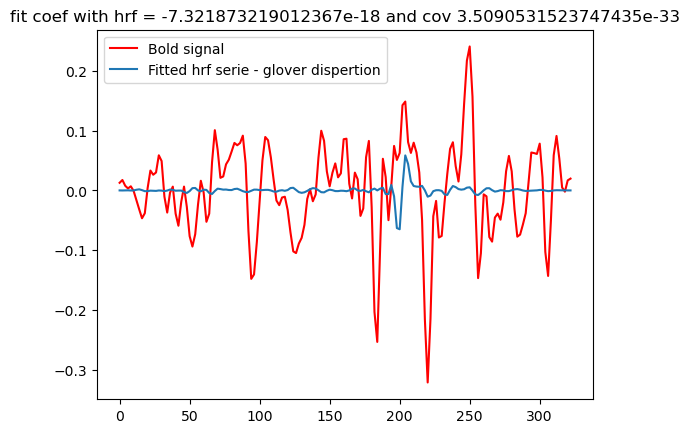

In [814]:
import nilearn.glm as glm
hrf_mod=np.array(np.zeros(len(time_vec))) #initialise an empty hrf response vector
for onset in pd_events['onset']: # use onset events to add hrf to the model
    hrf=glm.first_level.glover_dispersion_derivative(tr=dt, 
                                       oversampling=1 ,
                                       time_length=max(time_vec+1), 
                                       onset=onset)
    hrf_mod += hrf/sum(hrf)
    # use  glm.first_level.spm_hrf to add hrf of all onsets - no over sampling    
hrf_mod = butter_filter(2*(hrf_mod-hrf_mod.mean()), fc, fs, order, 'lowpass')
 

def hrf_model_func(hrf_serie,a,b):#,c,d):
    return a + b*hrf_serie

params, params_covariance =  optimize.curve_fit( hrf_model_func,
                                                hrf_mod,
                                                ts,
                                               absolute_sigma=True) #FILL IN; optimize.curve_fit

 
estimates= hrf_model_func(hrf_mod, params[0], params[1])

#plotting the results of the original datapoints and the fitted curve
plt.plot(time_vec, ts, "-r", label = "Bold signal")
plt.plot(time_vec, estimates, label = "Fitted hrf serie - glover dispertion")
plt.title("fit coef with hrf = "+str(params[1])+" and cov "+str(params_covariance[1,1]))
plt.legend()

In [ ]:
# now  batch process for all ts :
# removing complex signal drift 
# a / fit a 4 degree polynome 
# find a0, a, b, c, d that fit the signal y= a0 + ax + bx² +cx³ +dx⁴
# you can use use the code use in the filtering exercice 
# withoptimize.curve_fit and a test_func 
# or use numpy.polyfit
#p = np.poly1d(np.polyfit(time_vec, ts, 4))

#drift = p(time_vec)
from scipy import optimize
ts=masked_data
t = time_vec

param=np.polyfit(t, ts, 4)
#print(param)
p = [np.poly1d(par) for par in np.transpose(param)]


#drift= test_func(x_data, params[0], params[1], params[2], params[3], params[4] ) #FILL IN
drift= [pi(t) for pi in p]#test_func(x_data, params[0], params[1], params[2])#, params[3], params[4] ) #FILL IN
residuals=ts-np.transpose(drift)
z=np.polyfit(total_signal,residuals,1)
#print(z)
pp = [np.poly1d(zz) for zz in np.transpose(z)]
drift2= [ ppi(total_signal) for ppi in pp]
drift= np.array(drift)+np.array(drift2)
#print(np.array(drift2).shape)
# b/ remove the fitted drift from the signa
y=ts-np.transpose(drift)
#plotting the results of the original datapoints and the fitted curve
#plt.legend()
# b/ remove the fitted drift from the signal
yf=y-np.transpose(drift)

yf1 = butter_filter(yf, 0.01, fs, order, 'highpass')
yf2 = butter_filter(yf, 0.15, fs, order, 'lowpass')
yf2f=np.transpose(preprocessing.normalize(np.array(yf2-yf2.mean())))
#yf2.shape
#hrfs=np.tile(hrf_mod,(yf2.shape[1],1))

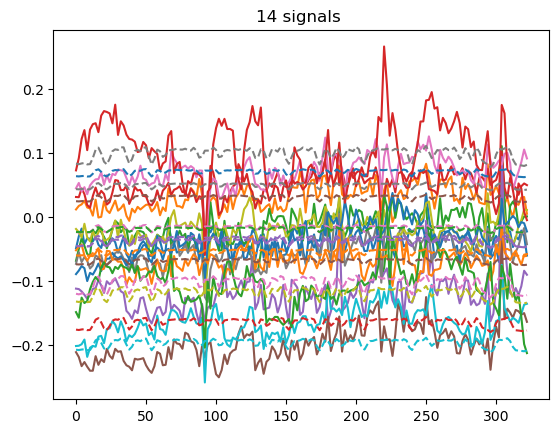

In [1023]:
hrf_mod=np.array(np.zeros(len(time_vec))) #initialise an empty hrf response vector
for onset in pd_events['onset']: # use onset events to add hrf to the model
    hrf=glm.first_level.spm_hrf(tr=dt, 
                                       oversampling=1 ,
                                       time_length=max(time_vec+1), 
                                       onset=onset)
    hrf_mod += hrf #np.exp(1.5*(1+hrf)) 
    # use  glm.first_level.spm_hrf to add hrf of all onsets - no over sampling    
hrf_mod = butter_filter(2*(hrf_mod-hrf_mod.mean()), 0.15, fs, order, 'lowpass')


lm_hrf=[ linregress(hrf_mod ,y_vx,alternative= 'greater') for y_vx in yf2f]
tpv=[lm.pvalue for lm in lm_hrf]
pvthr=0.05
sig_ok=np.where(np.array(tpv)<=pvthr)[0]
a0=[lm.intercept for lm in lm_hrf]
a=[lm.slope for lm in lm_hrf]
expected=np.outer(hrf_mod , np.array(a))+ np.array(a0)

plt.plot(time_vec, np.transpose(yf2f)[:,sig_ok], label = "voxel signal")
plt.plot(time_vec,  expected[:,sig_ok], '--',label = "drift + total drift")
plt.title(str(len(sig_ok))+" signals ")
plt.show()